In [ ]:
!git clone 'https://github.com/rubayetahmed314/augmented_BCCD.git'

Cloning into 'augmented_BCCD'...
remote: Enumerating objects: 1764, done.
remote: Counting objects: 100% (1764/1764), done.
remote: Compressing objects: 100% (1758/1758), done.
remote: Total 1764 (delta 6), reused 1764 (delta 6), pack-reused 0
Receiving objects: 100% (1764/1764), 11.51 MiB | 25.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.


#**DATA PRE-PROCESSING STARTS**

In [ ]:
import shutil
import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np
import os

In [ ]:
os.mkdir('/content/bcc/')

# Data segregation and moving to it's corresponding folders
- BCC
  - Images
    - Train (765 images [.jpg files])
    - Valid (73 images [.jpg files])
    - Test (36 images [.jpg files])
  - Labels
    - Train (765 labels [.txt files])
    - Valid (73 labels [.txt files])
    - Test (36 labels [.txt files])


In [ ]:
%%time

!cp -r '/content/augmented_BCCD/images' '/content/bcc'
!cp -r '/content/augmented_BCCD/labels' '/content/bcc'

CPU times: user 7.5 ms, sys: 18.4 ms, total: 25.9 ms
Wall time: 235 ms


In [ ]:
print("No. of Training images", len(os.listdir('/content/bcc/images/train')))
print("No. of Training labels", len(os.listdir('/content/bcc/labels/train')))

print("No. of Validation images", len(os.listdir('/content/bcc/images/valid')))
print("No. of Validation labels", len(os.listdir('/content/bcc/labels/valid')))

print("No. of Test images", len(os.listdir('/content/bcc/images/test')))
print("No. of Test labels", len(os.listdir('/content/bcc/labels/test')))

No. of Training images 765
No. of Training labels 765
No. of Validation images 73
No. of Validation labels 73
No. of Test images 36
No. of Test labels 36


# **END OF DATA PRE-PROCESSING**

#**YOLO V5 STARTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!cp -r '/content/yolov5/runs/train/BCCM' '/content/drive/MyDrive/MLProject/YOLO100Aug/'
!cp -r '/content/inference/output' '/content/drive/MyDrive/MLProject/YOLO100Aug/output'

#!mkdir -p '/content/drive/MyDrive/MLProject/YOLO/'
#!cp -r '/content/bcc' '/content/drive/MyDrive/MLProject/YOLO/'

Mounted at /content/drive


# Cloning from the yolo v5 repo.
More can be found at here : [yolo](https://github.com/ultralytics/yolov5)

In [ ]:
!git clone  'https://github.com/ultralytics/yolov5.git'

Cloning into 'yolov5'...
remote: Enumerating objects: 10923, done.
remote: Total 10923 (delta 0), reused 0 (delta 0), pack-reused 10923
Receiving objects: 100% (10923/10923), 11.06 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (7544/7544), done.


In [ ]:
!pip install -qr '/content/yolov5/requirements.txt'  # install dependencies

     |████████████████████████████████| 596 kB 5.4 MB/s 


# WE SHOULD CREATE A .yaml FILE AND THEN PLACE IT INSIDE THE yolov5 FOLDER

#**Contents of YAML file**

train: /content/bcc/images/train                    
val: /content/bcc/images/valid

nc: 3

names: ['Platelets', 'RBC', 'WBC']


In [ ]:
!echo -e 'train: /content/bcc/images/train\nval: /content/bcc/images/valid\n\nnc: 3\nnames: ['Platelets', 'RBC', 'WBC']' >> bcc.yaml
!cat 'bcc.yaml'

train: /content/bcc/images/train
val: /content/bcc/images/valid

nc: 3
names: [Platelets, RBC, WBC]


In [ ]:
shutil.copyfile('/content/bcc.yaml', '/content/yolov5/bcc.yaml')

'/content/yolov5/bcc.yaml'

#**Also edit the number of classes (nc) in the ./models/*.yaml file**

Choose the yolo model of your choice, here I chose yolov5s.yaml (yolo - small)


In [ ]:
!ls
!sed -i 's/nc: 80/nc: 3/g' ./yolov5/models/yolov5s.yaml

augmented_BCCD	bcc  bcc.yaml  sample_data  yolov5


# Training command

**Training Parameters**

!python 
- <'location of train.py file'> 
- --img <'width of image'>
- --batch <'batch size'>
- --epochs <'no of epochs'>
- --data <'location of the .yaml file'>
- --cfg <'Which yolo configuration you want'>(yolov5s/yolov5m/yolov5l/yolov5x).yaml | (small, medium, large, xlarge)
- --name <'Name of the best model after training'>

**METRICS FROM TRAINING PROCESS**

**No.of classes, No.of images, No.of targets, Precision (P), Recall (R), mean Average Precision (map)**
- Class | Images | Targets | P | R | mAP@.5 | mAP@.5:.95: |
- all   | 270    |     489 |    0.0899 |       0.827 |      0.0879 |      0.0551

In [ ]:
%%time

!python yolov5/train.py --img 416 --batch 8 --epochs 100 --data bcc.yaml --cfg yolov5/models/yolov5s.yaml --name BCCM

train: weights=yolov5/yolov5s.pt, cfg=yolov5/models/yolov5s.yaml, data=bcc.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=100, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=BCCM, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-273-g4de8b24 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_

# BATCH PREDICTION
- Results saved to inference/output


**Inference Parameters**

!python 
- <'location of detect.py file'> 
- --source <'location of image/ folder to predict'>
- --weight <'location of the saved best weights'>
- --name <'location of output files after prediction'>

In [ ]:
#!ls
!python yolov5/detect.py --source '/content/bcc/images/test/' --weights /content/yolov5/runs/train/BCCM/weights/best.pt --name '/content/inference/output' | tee '/content/out.txt'

detect: weights=['/content/yolov5/runs/train/BCCM/weights/best.pt'], source=/content/bcc/images/test/, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=/content/inference/output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-273-g4de8b24 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/36 /content/bcc/images/test/BloodImage_00038_jpg.rf.200c3a5b43c1213ed18fdd6ba12f0479.jpg: 640x640 2 Plateletss, 26 RBCs, 1 WBC, Done. (0.033s)
image 2/36 /content/bcc/images/test/BloodImage_00044_jpg.rf.0d7b935c065f8be2789fbcc94335f4a7.jpg: 640x640 3 Plateletss, 18 RBCs, 2 WBCs, Done. (0.033s)
image 3/36 

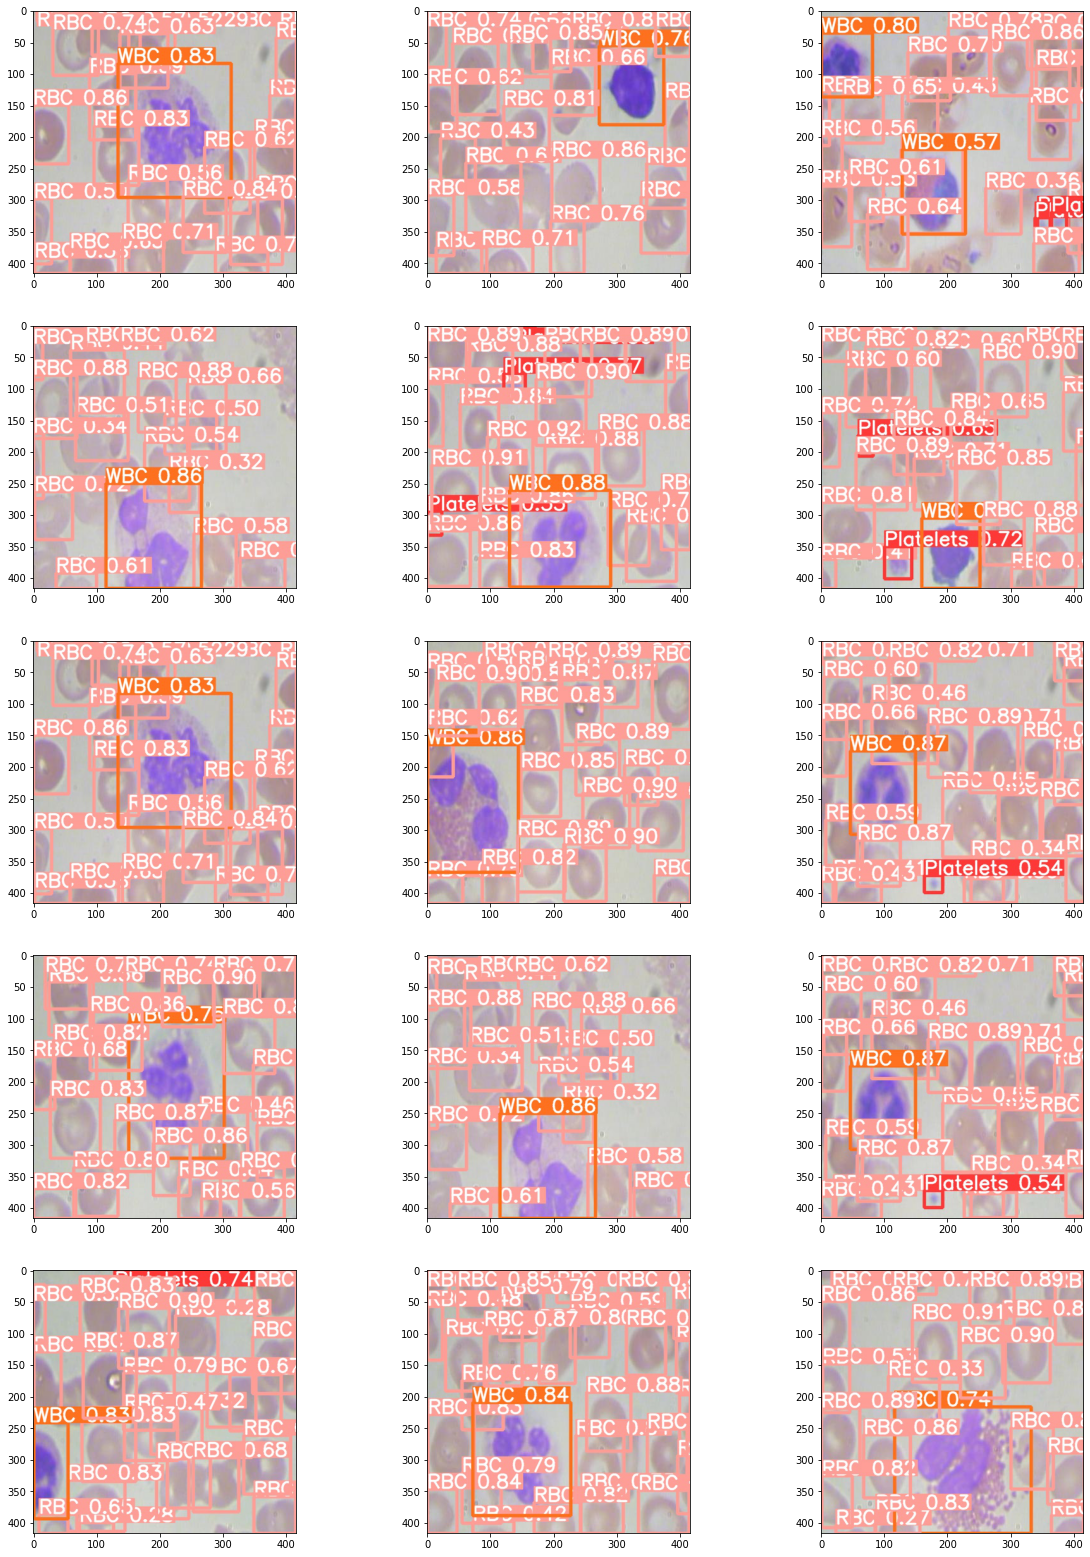

In [ ]:
disp_images = glob('/content/inference/output/*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# SINGLE IMAGE PREDICTIONS


detect: weights=['/content/yolov5/runs/train/BCCM/weights/best.pt'], source=/content/bcc/images/test/BloodImage_00044_jpg.rf.0d7b935c065f8be2789fbcc94335f4a7.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=/content/inference/output/single/, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-273-g4de8b24 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/bcc/images/test/BloodImage_00044_jpg.rf.0d7b935c065f8be2789fbcc94335f4a7.jpg: 640x640 3 Plateletss, 18 RBCs, 2 WBCs, Done. (0.033s)
Speed: 0.6ms pre-process, 33.2ms inference, 2.4ms NMS per image at shape (1, 3, 640, 640)
Resul

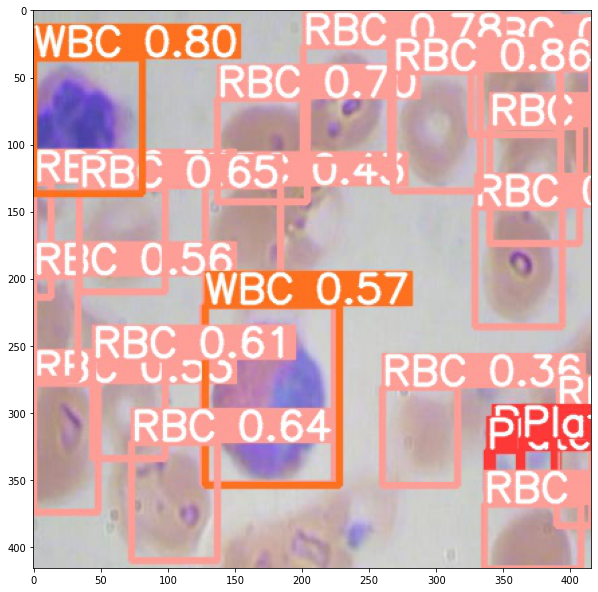

In [ ]:
# output = !python yolov5/detect.py --source /content/bcc/images/valid/BloodImage_00000.jpg --weights '/content/yolov5/runs/train/BCCM/weights/best.pt'
# print(output)

try:
  shutil.rmtree('/content/inference/output/single/')
except FileNotFoundError:
  pass

!python yolov5/detect.py --source /content/bcc/images/test/BloodImage_00044_jpg.rf.0d7b935c065f8be2789fbcc94335f4a7.jpg --weights '/content/yolov5/runs/train/BCCM/weights/best.pt' --name '/content/inference/output/single/'

disp_images = glob('/content/inference/output/single/*')
fig=plt.figure(figsize=(10, 18))
columns = 1
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# You need these files, if you wish to move the model to production

## Files

In [ ]:
!mkdir -p '/content/drive/MyDrive/MLProject/YOLO/SOURCE'
shutil.copyfile('/content/yolov5/detect.py', '/content/drive/MyDrive/MLProject/YOLO/SOURCE/detect.py')
shutil.copyfile('/content/yolov5/requirements.txt', '/content/drive/MyDrive/MLProject/YOLO/SOURCE/requirements.txt')
shutil.copyfile('/content/yolov5/runs/train/BCCM/weights/best.pt', '/content/drive/MyDrive/MLProject/YOLO/SOURCE/best_BCCM.pt')



'/content/drive/MyDrive/MLProject/YOLO/SOURCE/best_BCCM.pt'

## Folder

In [ ]:
!cp -r '/content/yolov5/models' '/content/drive/MyDrive/MLProject/YOLO/SOURCE/'
!cp -r '/content/yolov5/utils' '/content/drive/MyDrive/MLProject/YOLO/SOURCE/'


In [ ]:
import os
def input_split(folder):
	totalPlatelet = totalRBC = totalWBC = 0
	for filename in os.listdir(folder):
		with open(folder+'/'+filename, encoding='utf8') as f:
			for line in f:
				trimmedLine = line.strip()

				if int(trimmedLine[0]) == 0:
				    totalPlatelet += 1
				elif int(trimmedLine[0]) == 1:
				    totalRBC += 1
				elif int(trimmedLine[0]) == 2:
				    totalWBC += 1
	print(totalPlatelet, totalRBC, totalWBC)

folder = '/content/bcc/labels/test'
input_split(folder)

36 398 37


In [ ]:
totalPlatelet = totalRBC = totalWBC = 0

with open('/content/out.txt', encoding='utf8') as f:
    for line in f:
        trimmedLine = line.strip()

        indexPlatelet = trimmedLine.find('Platelet')
        indexRBC = trimmedLine.find('RBC')
        indexWBC = trimmedLine.find('WBC')

        if indexPlatelet != -1:
            countPlatelet = trimmedLine[indexPlatelet - 3: indexPlatelet].strip()
            totalPlatelet += int(countPlatelet)
            # print(countPlatelet, end=', ')
        if indexRBC != -1:
            countRBC = trimmedLine[indexRBC - 3: indexRBC].strip()
            totalRBC += int(countRBC)
            # print(countRBC, end=', ')
        if indexWBC != -1:
            countWBC = trimmedLine[indexWBC - 3: indexWBC].strip()
            totalWBC += int(countWBC)
            # print(countWBC, end='')

        # print()

print(totalPlatelet, totalRBC, totalWBC)

In [ ]:
!pip install darkflow.net

ERROR: Could not find a version that satisfies the requirement darkflow.net (from versions: none)
ERROR: No matching distribution found for darkflow.net


In [ ]:
!git clone https://github.com/thtrieu/darkflow.git

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2709
Receiving objects: 100% (2713/2713), 32.98 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (1761/1761), done.


In [ ]:
%cd /content/darkflow
#!python setup.py

/content/darkflow


In [ ]:
 !pip install .

Processing /content/darkflow
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for darkflow: filename=darkflow-1.0.0-cp37-cp37m-linux_x86_64.whl size=813230 sha256=dcaf6c33bd91a1e8c42b19e2c515bd54ae3cb706dd5c88619ecb1b9ba8e0afe6
  Stored in directory: /tmp/pip-ephem-wheel-cache-do0n69qm/wheels/6b/59/6b/2827925e5373062ee5e23af05293638f3020a12d35910df56f
Successfully built darkflow
  Attempting uninstall: darkflow
    Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [ ]:
!pip install tf-slim==1.1.0

In [ ]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8 MB 5.8 kB/s 
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.2.0
    Uninstalling tensorflow-gpu-2.2.0:
      Successfully uninstalled tensorflow-gpu-2.2.0


In [ ]:
import sys
from darkflow.cli import cliHandler

ModuleNotFoundError: ignored

In [ ]:
import cv2
import time
#from utils import iou
from scipy import spatial
from darkflow.net.build import TFNet


options = {'model': 'cfg/tiny-yolo-voc-3c.cfg',
           'load': 3750,
           'threshold': 0.1,
           'gpu': 0.7}

tfnet = TFNet(options)


pred_bb = []  # predicted bounding box
pred_cls = []  # predicted class
pred_conf = []  # predicted class confidence

def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = (xB - xA + 1) * (yB - yA + 1)

    if interArea < 0:
        interArea = 0

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    return interArea / float(boxAArea + boxBArea - interArea)
    
def blood_cell_count(file_name):
    rbc = 0
    wbc = 0
    platelets = 0

    cell = []
    cls = []
    conf = []

    record = []
    tl_ = []
    br_ = []
    iou_ = []
    iou_value = 0

    tic = time.time()
    image = cv2.imread('data/' + file_name)
    output = tfnet.return_predict(image)

    for prediction in output:
        label = prediction['label']
        confidence = prediction['confidence']
        tl = (prediction['topleft']['x'], prediction['topleft']['y'])
        br = (prediction['bottomright']['x'], prediction['bottomright']['y'])

        if label == 'RBC' and confidence < .5:
            continue
        if label == 'WBC' and confidence < .25:
            continue
        if label == 'Platelets' and confidence < .25:
            continue

        # clearing up overlapped same platelets
        if label == 'Platelets':
            if record:
                tree = spatial.cKDTree(record)
                index = tree.query(tl)[1]
                iou_value = iou(tl + br, tl_[index] + br_[index])
                iou_.append(iou_value)

            if iou_value > 0.1:
                continue

            record.append(tl)
            tl_.append(tl)
            br_.append(br)

        center_x = int((tl[0] + br[0]) / 2)
        center_y = int((tl[1] + br[1]) / 2)
        center = (center_x, center_y)

        if label == 'RBC':
            color = (255, 0, 0)
            rbc = rbc + 1
        if label == 'WBC':
            color = (0, 255, 0)
            wbc = wbc + 1
        if label == 'Platelets':
            color = (0, 0, 255)
            platelets = platelets + 1

        radius = int((br[0] - tl[0]) / 2)
        image = cv2.circle(image, center, radius, color, 2)
        font = cv2.FONT_HERSHEY_COMPLEX
        image = cv2.putText(image, label, (center_x - 15, center_y + 5), font, .5, color, 1)
        cell.append([tl[0], tl[1], br[0], br[1]])

        if label == 'RBC':
            cls.append(0)
        if label == 'WBC':
            cls.append(1)
        if label == 'Platelets':
            cls.append(2)

        conf.append(confidence)

    toc = time.time()
    pred_bb.append(cell)
    pred_cls.append(cls)
    pred_conf.append(conf)
    avg_time = (toc - tic) * 1000
    print('{0:.5}'.format(avg_time), 'ms')

    cv2.imwrite('output/' + file_name, image)
    cv2.imshow('Total RBC: ' + str(rbc) + ', WBC: ' + str(wbc) + ', Platelets: ' + str(platelets), image)
    print('Press "ESC" to close . . .')
    if cv2.waitKey(0) & 0xff == 27:
        cv2.destroyAllWindows()


image_name = '/content/bcc/images/test/BloodImage_00000_jpg.rf.08e05f6041bf5758b96d75859764bd75.jpg'
blood_cell_count(image_name)

print('All Done!')

AttributeError: ignored